## Boosting models:
1. AdaBoost
2. GBM
3. XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("credit_card_clean.csv")

In [3]:
rand_state = 1000

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploring the variables:

1. __ID__ : ID of each client 

2. __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit) 


3. __SEX__: Gender (1=male, 2=female)

4. __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5. __MARRIAGE__: Marital status (1=married, 2=single, 3=others)

6. __AGE__: Age in years

7. __PAY_1__: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

8. __PAY_2__: Repayment status in August, 2005 (scale same as above)

9. __PAY_3__: Repayment status in July, 2005 (scale same as above)

10. __PAY_4__: Repayment status in June, 2005 (scale same as above)

11. __PAY_5__: Repayment status in May, 2005 (scale same as above)

12. __PAY_6__: Repayment status in April, 2005 (scale same as above)

13. __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)

14. __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)

15. __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)

16. __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)

17. __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)

18. __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)

19. __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)

20. __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)

21. __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)

22. __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)

23. __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)

24. __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)

25. __default.payment.next.month__: Default payment (1=yes, 0=no)


*Note: NT is Taiwain Dollars*





In [8]:
df.isnull().sum().sum()

0

In [12]:
df.shape

(30000, 25)

Looks good!
Now let's see if there are any duplicates!

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

---

## Encode ordinal categorical features as an integer array.

For boosting models in general we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handle string data. We should transform  string categorical variables into quantitative variables. 

It seems that **SEX, EDUCATION, MARRIAGE** are string categotical variables and should be transformed into numerics. 


In [23]:
# The categorical variables in the random forest and Gradient Boost Model(GBM),
 # You have to make sure that these are numerical values. 
 # However Boosting models(AdaBoost,GBM, XGBoost) you don't need to be worried about that.

In [16]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [17]:
ordinal_categories = ["SEX", "EDUCATION", "MARRIAGE"]

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
enc = OrdinalEncoder()

In [21]:
df[ordinal_categories] = enc.fit_transform(df[ordinal_categories])

In [22]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0.0,3.0,0.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0.0,3.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [24]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['grad', 'highschool', 'other', 'university'], dtype=object),
 array(['married', 'other', 'single'], dtype=object)]

Remember, with other machine learning models, we ended up with **78 features** using the same data set because we had to transform categorical variables into dummies. But with RF, there is only **23 features** to work with. 

### Scaling features
In boosting models, we don't need to scale the features!! However, you can scale the features to speed up the process a little bit and be better protected against outliers. In this example we don't scale the features for a fair comparison to our previous models applied to the same data set. 

In [25]:
pd.crosstab(df["DEFAULT"], df["DEFAULT"], normalize=True)
# Data is relatively balanced.

DEFAULT,0,1
DEFAULT,,
0,0.7788,0.0000
1,0.0000,0.2212


### Defining the variables and splitting the data

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [27]:
y = df["DEFAULT"]
X = df.drop(columns=["DEFAULT", "ID"])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

## Boosting classification with Sklearn

In [30]:
from sklearn.ensemble import RandomForestClassifier
# We will bew using RF as our benchmark.

In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#### Training the models

In [33]:
%%time
# Fitting RF classifier to the Training Dataset
rf_model = RandomForestClassifier(random_state= rand_state)
rf_model.fit(X_train, y_train)

CPU times: total: 3.09 s
Wall time: 3.09 s


RandomForestClassifier(random_state=1000)

In [34]:
%%time
# Fitting AdaBoost classifier to the training dataset
ada_model = AdaBoostClassifier(random_state= rand_state)
ada_model.fit(X_train, y_train)

CPU times: total: 1.05 s
Wall time: 1.07 s


AdaBoostClassifier(random_state=1000)

In [37]:
%%time
# Fitting Gradient Boosting classifier to the Training dataset
gbm_model = GradientBoostingClassifier(random_state=rand_state)
gbm_model.fit(X_train, y_train)

CPU times: total: 4.73 s
Wall time: 4.73 s


GradientBoostingClassifier(random_state=1000)

In [36]:
%%time
# Fitting XGBoost classifier to the Training dataset
xgb_model = XGBClassifier(random_state=rand_state)
xgb_model.fit(X_train, y_train)

CPU times: total: 1.67 s
Wall time: 1.63 s


XGBClassifier(random_state=1000)

In [38]:
# Predicting the Test set probabilities and classes
y_pred_rf = rf_model.predict(X_test)
y_pred_ada = ada_model.predict(X_test)
y_pred_gbm = gbm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

---
## Evaluating the model performance on test data

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Comparing accuracy and f1scores among the boosters and RF

In [41]:
print(f"RF Accuracy : {accuracy_score(y_test, y_pred_rf)}")
print(f"ADA Accuracy : {accuracy_score(y_test, y_pred_ada)}")
print(f"GBM Accuracy : {accuracy_score(y_test, y_pred_gbm)}")
print(f"XGB Accuracy : {accuracy_score(y_test, y_pred_gbm)}")

RF Accuracy : 0.8203333333333334
ADA Accuracy : 0.8193333333333334
GBM Accuracy : 0.8261111111111111
XGB Accuracy : 0.8261111111111111


In [42]:
print(f"RF f1 : {f1_score(y_test, y_pred_rf)}")
print(f"ADA f1 : {f1_score(y_test, y_pred_ada)}")
print(f"GBM f1 : {f1_score(y_test, y_pred_gbm)}")
print(f"XGB f1 : {f1_score(y_test, y_pred_gbm)}")

RF f1 : 0.4795622787254586
ADA f1 : 0.4458077709611452
GBM f1 : 0.4920480363518338
XGB f1 : 0.4920480363518338


---------------

## Feature Importance

In [44]:
features = list(X_train.columns)
print(features)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [45]:
rf_importance = rf_model.feature_importances_
ada_importance = ada_model.feature_importances_
gbm_importance = gbm_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

In [52]:
FIM = pd.DataFrame({
    "Features" : features,
    "RF Feature Importance" : rf_importance,
    "ADA Feature Importance" : ada_importance,
    "GBM Feature Importance" : gbm_importance,
    "XGB Feature Importance" : xgb_importance
})

FIM  = FIM.sort_values(by="RF Feature Importance", ascending=False)
FIM

,Features,RF Feature Importance,ADA Feature Importance,GBM Feature Importance,XGB Feature Importance
5,PAY_1,0.096249,0.10,0.618343,0.410341
4,AGE,0.067517,0.00,0.006045,0.010179
11,BILL_AMT1,0.060849,0.14,0.040861,0.019105
0,LIMIT_BAL,0.059658,0.08,0.024725,0.022190
12,BILL_AMT2,0.053940,0.04,0.007690,0.013228
13,BILL_AMT3,0.052283,0.06,0.010322,0.011716
17,PAY_AMT1,0.051532,0.04,0.018524,0.026608
14,BILL_AMT4,0.051039,0.06,0.005820,0.009707
16,BILL_AMT6,0.050960,0.00,0.011250,0.009298
15,BILL_AMT5,0.050459,0.02,0.005626,0.009864


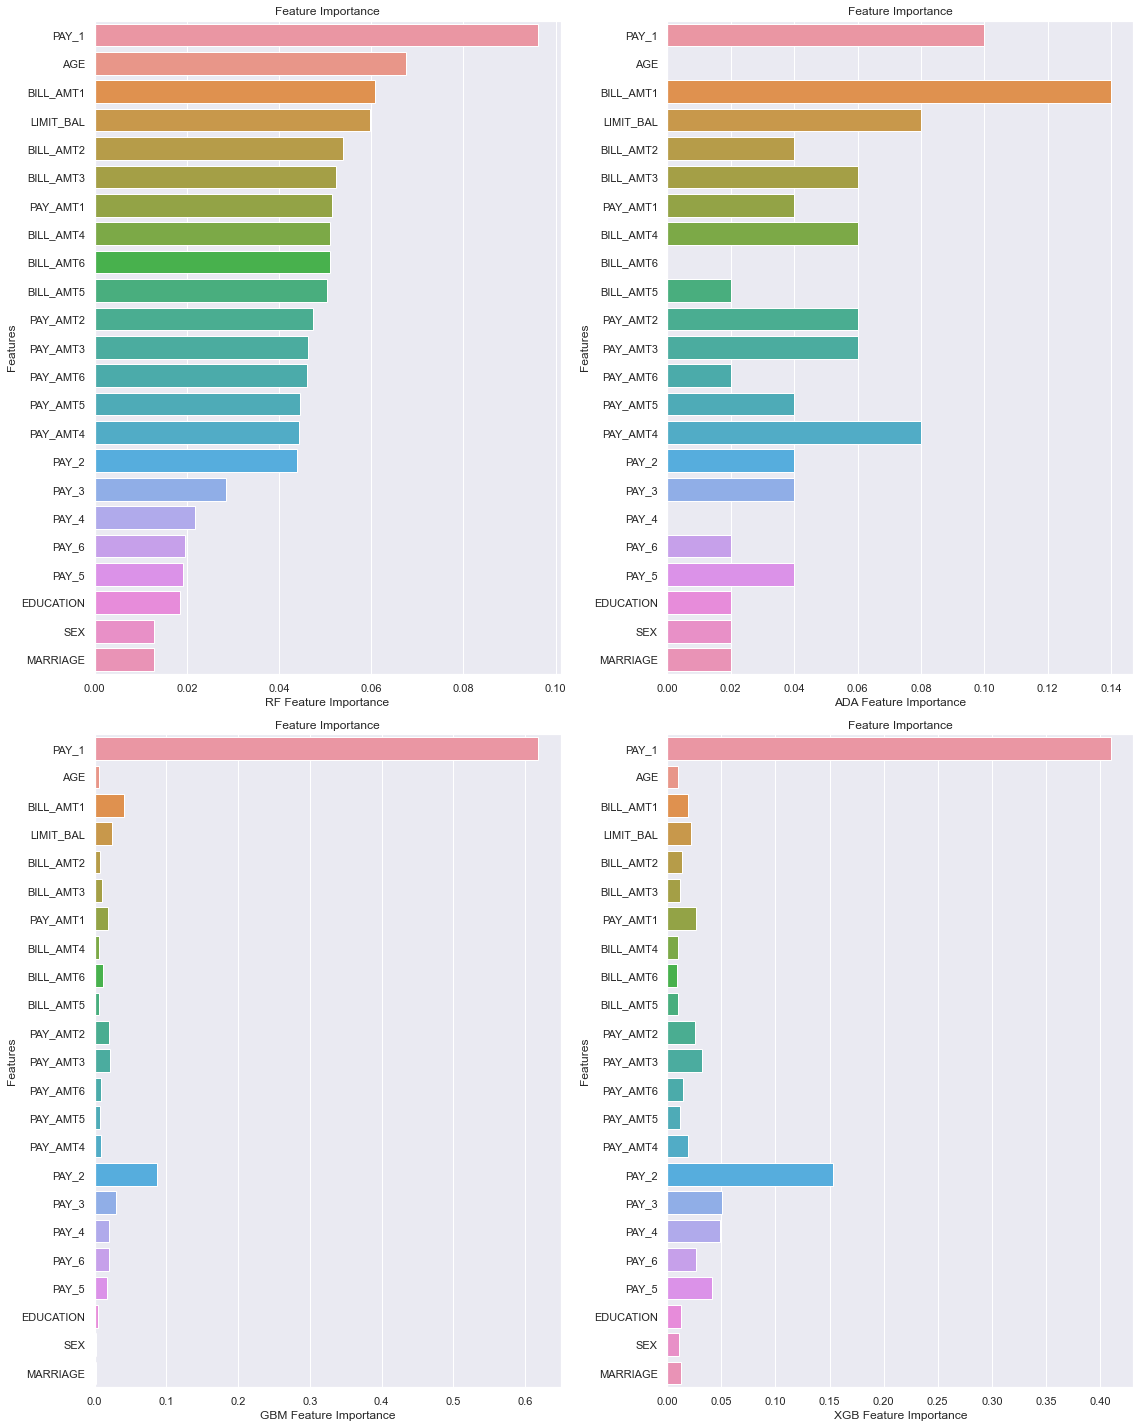

In [65]:
plt.figure(figsize=(16,20))
i = 1
for column in FIM.drop(columns="Features").columns:
    plt.subplot(2,2,i)
    plt.title("Feature Importance")
    sns.barplot(x = column, y = "Features", data = FIM)
    i+=1
plt.tight_layout()

Recall:
- PAY_1: repayment status in the past 1 month (paid in full, paid minimum due, delay for # months)
- PAY_2: repayment status in the past 2 months
- .... 
- BILL_AMT: amount of bill statement


#### Plot_importance with XGBoost

In [66]:
from xgboost import plot_importance

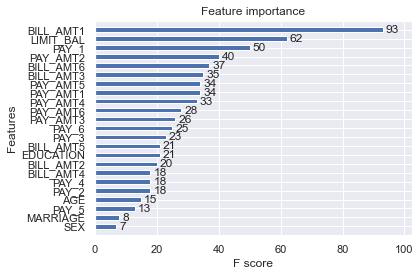

In [83]:
plot_importance(xgb_model, height=0.5, grid="gain")
plt.tight_layout()

---